컨볼루션 레이어

In [10]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 22s 439us/sample - loss: 2.0782 - accuracy: 0.4451 - val_loss: 1.5071 - val_accuracy: 0.7125
Epoch 2/30
50000/50000 [==============================] - 22s 438us/sample - loss: 0.8232 - accuracy: 0.8029 - val_loss: 0.4689 - val_accuracy: 0.8702
Epoch 3/30
50000/50000 [==============================] - 21s 420us/sample - loss: 0.4298 - accuracy: 0.8803 - val_loss: 0.3408 - val_accuracy: 0.9055
Epoch 4/30
50000/50000 [==============================] - 21s 417us/sample - loss: 0.3437 - accuracy: 0.9005 - val_loss: 0.2856 - val_accuracy: 0.9197
Epoch 5/30
50000/50000 [==============================] - 19s 378us/sample - loss: 0.2974 - accuracy: 0.9134 - val_loss: 0.2520 - val_accuracy: 0.9267
Epoch 6/30
50000/50000 [==============================] - 21s 425us/sample - loss: 0.2641 - accuracy: 0.9216 - val_loss: 0.2260 - val_accuracy: 0.9366
Epoch 7/30
50000/50000 [====================

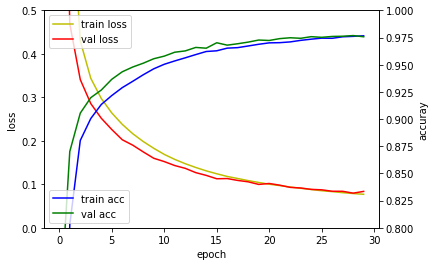

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0753 - accuracy: 0.9770
## evaluation loss and_metrics ##
[0.07532955619916319, 0.977]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

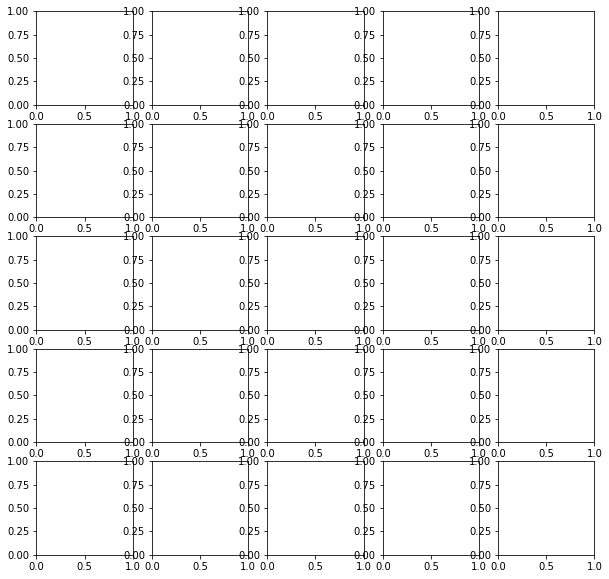

In [4]:
import numpy as np
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/int(plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()

깊은 컨볼루션 레이어

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 66s 1ms/sample - loss: 2.2809 - accuracy: 0.1584 - val_loss: 2.2282 - val_accuracy: 0.4739
Epoch 2/30
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.9714 - accuracy: 0.3480 - val_loss: 1.0327 - val_accuracy: 0.7898
Epoch 3/30
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.9970 - accuracy: 0.6696 - val_loss: 0.4132 - val_accuracy: 0.8918
Epoch 4/30
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.6311 - accuracy: 0.7973 - val_loss: 0.2859 - val_accuracy: 0.9216
Epoch 5/30
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.4913 - accuracy: 0.8460 - val_loss: 0.2208 - val_accuracy: 0.9370
Epoch 6/30
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.4151 - accuracy: 0.8695 - val_loss: 0.1918 - val_accuracy: 0.9438
Epoch 7/30
50000/50000 [==============================] 

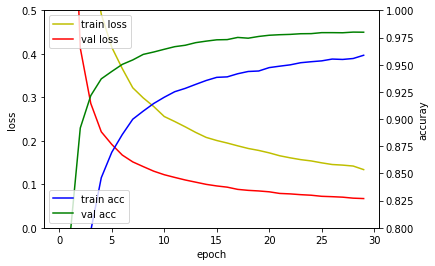

10000/10000 [==============================] - 2s 194us/sample - loss: 0.0611 - accuracy: 0.9794
## evaluation loss and_metrics ##
[0.0611418462456204, 0.9794]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

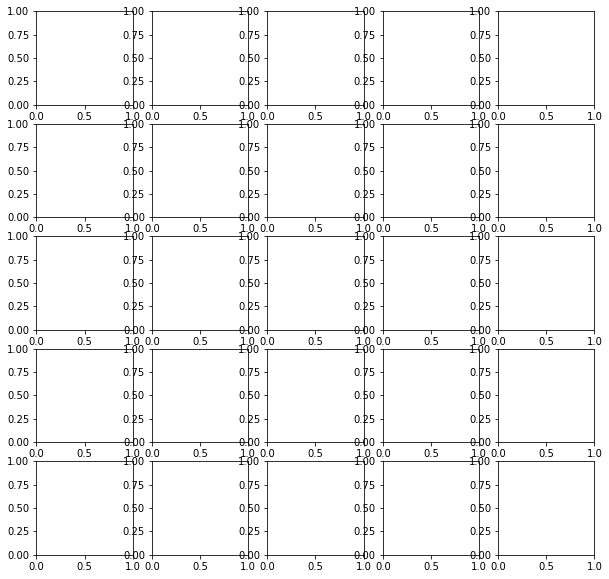

In [5]:
# 0. 사용할 패키지 불러오기
import numpy as np

import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/int(plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()